Assignment 3: part II
---

By: Bilal Ahmed

In [75]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [76]:
#Creating dataframe from csv file
df = pd.read_csv('Social_Network_Ads.csv')

# overview of the data
df.head()#getting the first 5 rows of data

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [77]:
#checking number of rows and columns
df.shape

(400, 5)

There are 400 rows with 5 columns

In [78]:
# examining the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


No missing value in any column

In [79]:
#checking the unique elements in each attribute
df.nunique()

User ID            400
Gender               2
Age                 43
EstimatedSalary    117
Purchased            2
dtype: int64

In [80]:
df = df.drop(columns=['User ID'])
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [81]:
# encoding "Gender" Column
df.replace({'Gender':{'Male':0,'Female':1}},inplace=True)

In [82]:
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,0,19,19000,0
1,0,35,20000,0
2,1,26,43000,0
3,1,27,57000,0
4,0,19,76000,0


In [83]:
#exclude_cols = ['writing score','reading score','math score']  # Column I do not want in the loop below

for col in df.columns:
    #if col in exclude_cols:
        #continue  


    print(f"\n--- Value counts (%): {col} ---")
    percent = df[col].value_counts(normalize=True, dropna=False) * 100
    print(percent.round(2).astype(str) + '%')


--- Value counts (%): Gender ---
1    51.0%
0    49.0%
Name: Gender, dtype: object

--- Value counts (%): Age ---
35     8.0%
37     5.0%
26     4.0%
41     4.0%
42     4.0%
39    3.75%
40    3.75%
48     3.5%
47     3.5%
27    3.25%
38    3.25%
28     3.0%
36     3.0%
46     3.0%
31    2.75%
30    2.75%
49     2.5%
29     2.5%
33    2.25%
32    2.25%
24    2.25%
59    1.75%
19    1.75%
45    1.75%
20    1.75%
60    1.75%
34     1.5%
23     1.5%
52     1.5%
25     1.5%
58     1.5%
53    1.25%
57    1.25%
22    1.25%
18    1.25%
21     1.0%
50     1.0%
54     1.0%
55    0.75%
56    0.75%
51    0.75%
43    0.75%
44     0.5%
Name: Age, dtype: object

--- Value counts (%): EstimatedSalary ---
72000      3.0%
80000     2.75%
79000      2.5%
75000     2.25%
71000     2.25%
          ...  
123000    0.25%
37000     0.25%
115000    0.25%
148000    0.25%
139000    0.25%
Name: EstimatedSalary, Length: 117, dtype: object

--- Value counts (%): Purchased ---
0    64.25%
1    35.75%
Name: Purchase

Gaussain NB

In [118]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report

In [119]:
X = df.drop('Purchased', axis=1)
y = df['Purchased']

In [120]:
X.head()

,Gender,Age,EstimatedSalary
0,0,19,19000
1,0,35,20000
2,1,26,43000
3,1,27,57000
4,0,19,76000


In [121]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Purchased, dtype: int64

In [122]:
# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [123]:
print("Scaling features using StandardScaler...")
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Scaling features using StandardScaler...


In [163]:
# Train Naive Bayes classifier
gaussian_nb_model = GaussianNB()
gaussian_nb_model.fit(X_train_scaled, y_train)

GaussianNB()

In [164]:
# Make predictions
y_pred = gaussian_nb_model.predict(X_test_scaled)

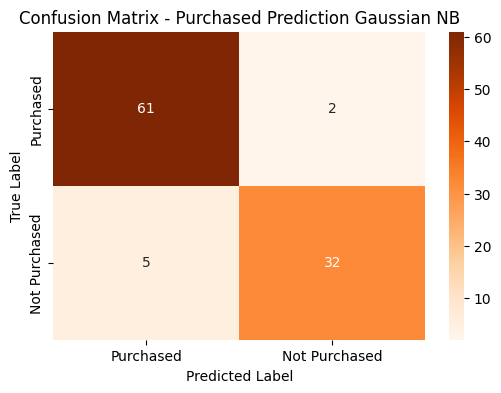

In [165]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges', xticklabels=['Purchased', 'Not Purchased'], yticklabels=['Purchased', 'Not Purchased'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Purchased Prediction Gaussian NB')
plt.show()

Tp = 61 predicted purchased a particular product and has rightly predicted;
Tn= 2 predicted not purchased but actually purchased;
Fp= 5 predicted purchased but actually not purchased;
Fn = 32 did not purchased and were right predicted

In [127]:
#Classification Report
print("\n📋 Classification Report:")
print(classification_report(y_test, y_pred, target_names=['Purchased', 'Not Purchased']))


📋 Classification Report:
               precision    recall  f1-score   support

    Purchased       0.92      0.97      0.95        63
Not Purchased       0.94      0.86      0.90        37

     accuracy                           0.93       100
    macro avg       0.93      0.92      0.92       100
 weighted avg       0.93      0.93      0.93       100



In [128]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

In [166]:
k = 3  # same can be tested for 5 and 7 if only the value gets changed here
knn3_model = KNeighborsClassifier(n_neighbors=k)
knn3_model.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=3)

In [167]:
# Predict on test data
y_pred = knn3_model.predict(X_test_scaled)

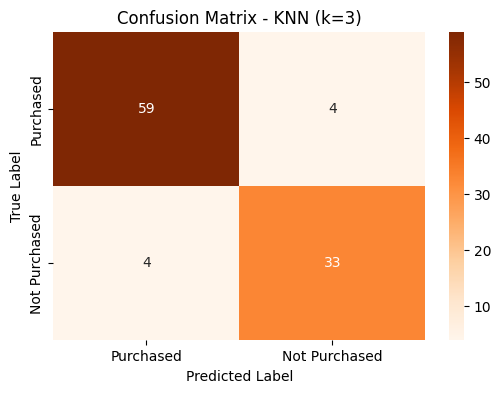

In [168]:
#Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges', xticklabels=['Purchased', 'Not Purchased'], yticklabels=['Purchased', 'Not Purchased'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title(f'Confusion Matrix - KNN (k={k})')
plt.show()

Tp = 59 predicted purchased right;
Tn= 4 predicted not purchased but actually purchased;
Fp= 4 predicted purchased but actually not purchased;
Fn = 33 did not purchased and were right predicted

In [132]:
#Classification Report
print("\n📋 Classification Report:")
print(classification_report(y_test, y_pred, target_names=['Purchased', 'Not Purchased']))


📋 Classification Report:
               precision    recall  f1-score   support

    Purchased       0.94      0.94      0.94        63
Not Purchased       0.89      0.89      0.89        37

     accuracy                           0.92       100
    macro avg       0.91      0.91      0.91       100
 weighted avg       0.92      0.92      0.92       100



Knn =5

In [169]:
k = 5  
knn5_model = KNeighborsClassifier(n_neighbors=k)
knn5_model.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [170]:
# Predict on test data
y_pred = knn5_model.predict(X_test_scaled)

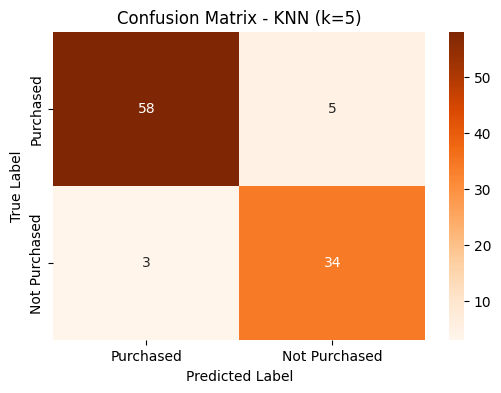

In [171]:
#Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges', xticklabels=['Purchased', 'Not Purchased'], yticklabels=['Purchased', 'Not Purchased'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title(f'Confusion Matrix - KNN (k={k})')
plt.show()

Tp = 58 predicted purchased right;
Tn= 5 predicted not purchased but actually purchased;
Fp= 3 predicted purchased but actually not purchased;
Fn = 34 did not purchased and were right predicted

In [172]:
#Classification Report
print("\n📋 Classification Report:")
print(classification_report(y_test, y_pred, target_names=['Purchased', 'Not Purchased']))


📋 Classification Report:
               precision    recall  f1-score   support

    Purchased       0.95      0.92      0.94        63
Not Purchased       0.87      0.92      0.89        37

     accuracy                           0.92       100
    macro avg       0.91      0.92      0.92       100
 weighted avg       0.92      0.92      0.92       100



knn = 7

In [173]:
k = 7
knn7_model = KNeighborsClassifier(n_neighbors=k)
knn7_model.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=7)

In [174]:
# Predict on test data
y_pred = knn7_model.predict(X_test_scaled)

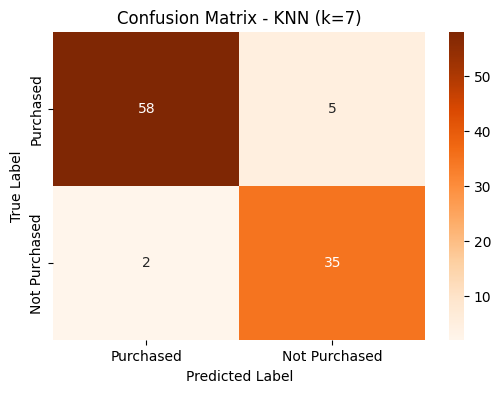

In [175]:
#Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges', xticklabels=['Purchased', 'Not Purchased'], yticklabels=['Purchased', 'Not Purchased'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title(f'Confusion Matrix - KNN (k={k})')
plt.show()

Tp = 58 predicted purchased right;
Tn= 5 predicted not purchased but actually purchased;
Fp= 2 predicted purchased but actually not purchased;
Fn = 35 did not purchased and were right predicted

In [176]:
#Classification Report
print("\n📋 Classification Report:")
print(classification_report(y_test, y_pred, target_names=['Purchased', 'Not Purchased']))


📋 Classification Report:
               precision    recall  f1-score   support

    Purchased       0.97      0.92      0.94        63
Not Purchased       0.88      0.95      0.91        37

     accuracy                           0.93       100
    macro avg       0.92      0.93      0.93       100
 weighted avg       0.93      0.93      0.93       100



Decsion Tree

In [155]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, accuracy_score

In [177]:
#Train decision tree
dt_gini_mode = DecisionTreeClassifier(max_depth=3, random_state=42)
dt_gini_mode.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [178]:
# Evaluate model
y_pred = dt_gini_mode.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.92

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.90      0.93        63
           1       0.85      0.95      0.90        37

    accuracy                           0.92       100
   macro avg       0.91      0.93      0.92       100
weighted avg       0.92      0.92      0.92       100



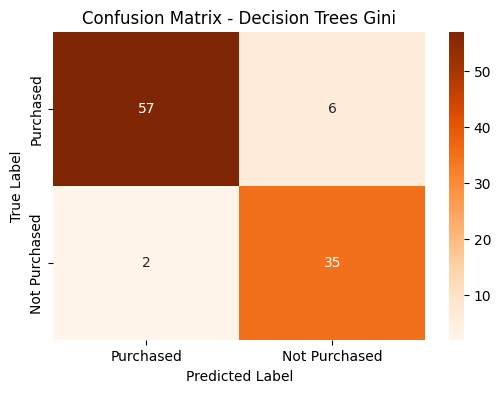

In [179]:
#Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges', xticklabels=['Purchased', 'Not Purchased'], yticklabels=['Purchased', 'Not Purchased'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title(f'Confusion Matrix - Decision Trees Gini')
plt.show()

Tp = 57 predicted purchased right;
Tn= 6 predicted not purchased but actually purchased;
Fp= 2 predicted purchased but actually not purchased;
Fn = 35 did not purchased and were right predicted

Decision Tree with Entropy now

In [180]:
dt_entropy_model = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)
dt_entropy_model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)

In [181]:
# Evaluate model
y_pred = dt_entropy_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.92

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.90      0.93        63
           1       0.85      0.95      0.90        37

    accuracy                           0.92       100
   macro avg       0.91      0.93      0.92       100
weighted avg       0.92      0.92      0.92       100



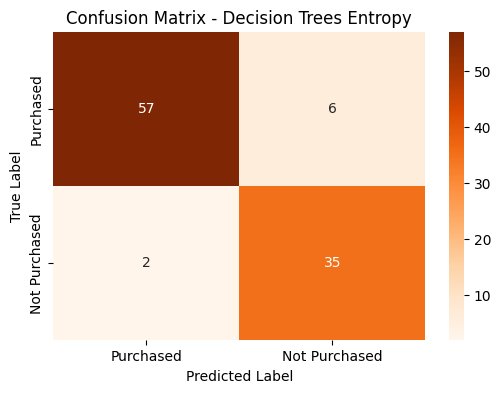

In [182]:
#Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges', xticklabels=['Purchased', 'Not Purchased'], yticklabels=['Purchased', 'Not Purchased'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title(f'Confusion Matrix - Decision Trees Entropy')
plt.show()

Tp = 57 predicted purchased right;
Tn= 6 predicted not purchased but actually purchased;
Fp= 2 predicted purchased but actually not purchased;
Fn = 35 did not purchased and were right predicted

The results are same as Gini

Summarizing all the results 

In [183]:
# List of tuples with model name and trained model object
models = [
    ('Gaussian NB', gaussian_nb_model),
    ('KNN (k=3)', knn3_model),
    ('KNN (k=5)', knn5_model),
    ('KNN (k=7)', knn7_model),
    ('Decision Tree (Gini)', dt_gini_mode),
    ('Decision Tree (Entropy)', dt_entropy_model)
]

# Dictionary to store classification reports as strings
reports_dict = {}

# Loop through models
for model_name, model in models:
    y_pred = model.predict(X_test)

    print(f"\n📋 Classification Report for {model_name}:")
    report_text = classification_report(y_test, y_pred, target_names=['Purchased', 'Not Purchased'])
    print(report_text)

    # Store in dictionary
    reports_dict[model_name] = report_text


📋 Classification Report for Gaussian NB:
               precision    recall  f1-score   support

    Purchased       0.91      0.97      0.94        63
Not Purchased       0.94      0.84      0.89        37

     accuracy                           0.92       100
    macro avg       0.92      0.90      0.91       100
 weighted avg       0.92      0.92      0.92       100


📋 Classification Report for KNN (k=3):
               precision    recall  f1-score   support

    Purchased       0.94      0.94      0.94        63
Not Purchased       0.89      0.89      0.89        37

     accuracy                           0.92       100
    macro avg       0.91      0.91      0.91       100
 weighted avg       0.92      0.92      0.92       100


📋 Classification Report for KNN (k=5):
               precision    recall  f1-score   support

    Purchased       0.95      0.92      0.94        63
Not Purchased       0.87      0.92      0.89        37

     accuracy                           0.92 

Summary of results

Best Performing Model: KNN (k=7)
---

Due to following reasons:
- Highest accuracy (93%)

- Highest macro F1-score (0.93)

- Balanced performance on both classes:

"Purchased" f1-score: 0.94

"Not Purchased" f1-score: 0.91

- High recall for both classes (important if both false positives and false negatives are costly).